# Dashboard Sleep Health Analysis

https://lookerstudio.google.com/reporting/03b4a1d7-5610-48ff-a470-35dc286a8f19

# Introduction

Ferdiansyah Ersatiyo -RMT FTDS 020-

# Identifikasi Masalah

Problem Statement:\
Mengetahui pengaruh tidur terhadap aspek kesehatan tubuh

Penjabaran masalah dengan metode 5W+1H:



- Apakah orang yang memiliki Heart_rate tinggi merupakan orangn yang mengalami sleep disorder (Descriptive Analysis)
- Tipe pekerjaan apa dengan kualitas tidur terbaik (visualisasi bar)
- Bagaimana waktu tidur mempengaruhi kualitas tidur (visualisai line)
- Tingkat stress berdasarkan waktu tidur dan pekerjaannya (Scatter plot)
- Umur orang mengalami sleep disorder (barchart)
- Apakah orang dengan tipe badan obese berkemungkinan mengalamai sleep apnea lebih tinggi ? (Chi Square inferential)

**SMART**

>Kita adalah stakeholder yang ingin peduli terhadap kesehatan pekerja.Dalam rangka memberikan edukasi mengenai pengaruh tidur terhadap kesehatan tubuh. Data sleep health and lifestyle dataset akan menjadi acuan untuk melakukan analisis. Kita akan memberikan rekomendasi pekerjaan yang memiliki kualitas tidur terbaik, kemudian kita juga akan memaparkan apa saja dampak negatif bila kurang tidur, agar para pekerja lebih baik dalam menjaga kesehatan tidurnya masing-masing. Dengan adanya edukasi mengenai pengaruh tidur diharapkan dapat menurunkan angka sleep disorder yang dialami oleh para pekerja.






# Data Loading

dataset yang digunakan adalah data **Sleep Health and Lifestyle Dataset** yang diambil dari [kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) dan di upload ke **GOOGLE BIG QUERY** untuk memudahkan query yang akan dilakukan

Dataset Explanation:\
Person ID: An identifier for each individual.

*   Person ID: An identifier for each individual.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person in years.
* Occupation: The occupation or profession of the person.
* Sleep Duration (hours): The number of hours the person sleeps per day.
* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* BMI Category: The BMI category of the person (e.g., Underweight, Normal , Overweight).
* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* Heart Rate (bpm): The resting heart rate of the person in beats per minute.
* Daily Steps: The number of steps the person takes per day.
* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Details about Sleep Disorder Column:

None: The individual does not exhibit any specific sleep disorder\
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.\
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# menghubungkan google bigquerry dengan google colab
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "propane-girder-388207" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


In [3]:
## loading data distribution dari bigquerry ke google collab

sleep_df = client.query('''
SELECT *
FROM milestone1.Sleep_health_and_lifestyle_dataset
''').to_dataframe()

sleep_df.head() # melihat 5 data teratas

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
1,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
2,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


# EDA

In [4]:
sleep_df.isnull().sum()

# mencheck missing values pada data

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [5]:
sleep_df.dtypes
# check data types

Person_ID                    Int64
Gender                      object
Age                          Int64
Occupation                  object
Sleep_Duration             float64
Quality_of_Sleep             Int64
Physical_Activity_Level      Int64
Stress_Level                 Int64
BMI_Category                object
Blood_Pressure              object
Heart_Rate                   Int64
Daily_Steps                  Int64
Sleep_Disorder              object
dtype: object

In [6]:
sleep_df.describe()

,Person_ID,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
count,374.0,374.0,374.000000,374.0,374.0,374.0,374.0,374.0
mean,187.5,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.84492
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.0,27.0,5.800000,4.0,30.0,3.0,65.0,3000.0
25%,94.25,35.25,6.400000,6.0,45.0,4.0,68.0,5600.0
50%,187.5,43.0,7.200000,7.0,60.0,5.0,70.0,7000.0
75%,280.75,50.0,7.800000,8.0,75.0,7.0,72.0,8000.0
max,374.0,59.0,8.500000,9.0,90.0,8.0,86.0,10000.0


In [7]:
sleep_df['BMI_Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI_Category, dtype: int64

In [8]:
# Normal dan Normal Weight merupakan satu kesatuan yang sama
sleep_df['BMI_Category'] = sleep_df['BMI_Category'].replace(['Normal'],'Normal Weight')

In [9]:
# data clean
sleep_df['BMI_Category'].value_counts()

Normal Weight    216
Overweight       148
Obese             10
Name: BMI_Category, dtype: int64

In [10]:
from google.colab import files
sleep_df.to_csv('Sleep Health Analysis.csv', encoding = 'UTF-8')
files.download('Sleep Health Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analisis dan perhitungan

## Apakah orang yang memiliki Heart_rate tinggi merupakan orangn yang mengalami sleep disorder? (Descriptive Analysis)

In [11]:
#buat list data bertipe object dan number
obj_cols= list(sleep_df.select_dtypes('object'))
num_cols= list(sleep_df.select_dtypes('number'))
print('Object : ', obj_cols)
print('Num : ', num_cols)

Object :  ['Gender', 'Occupation', 'BMI_Category', 'Blood_Pressure', 'Sleep_Disorder']
Num :  ['Person_ID', 'Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'Heart_Rate', 'Daily_Steps']


In [12]:
#central tendency
data_mean = sleep_df[num_cols].mean().rename('mean')
data_median = sleep_df[num_cols].median().rename('median')
data_mode = sleep_df[num_cols + obj_cols].mode().iloc[0].rename('mode')

central_ten = pd.concat([data_mean,data_median,data_mode], axis =1 )
central_ten


,mean,median,mode
Person_ID,187.500000,187.5,1
Age,42.184492,43.0,43
Sleep_Duration,7.132086,7.2,7.2
Quality_of_Sleep,7.312834,7.0,8
Physical_Activity_Level,59.171123,60.0,60
Stress_Level,5.385027,5.0,3
Heart_Rate,70.165775,70.0,68
Daily_Steps,6816.844920,7000.0,8000
Gender,NaN,NaN,Male
Occupation,NaN,NaN,Nurse


berdasarkan central tendency dapat dilihat bahwa  data heart_rate memiliki nilai mean > median, sehingga perlu dilakukan checking outliers

<Axes: title={'center': 'Heart_Rate'}>

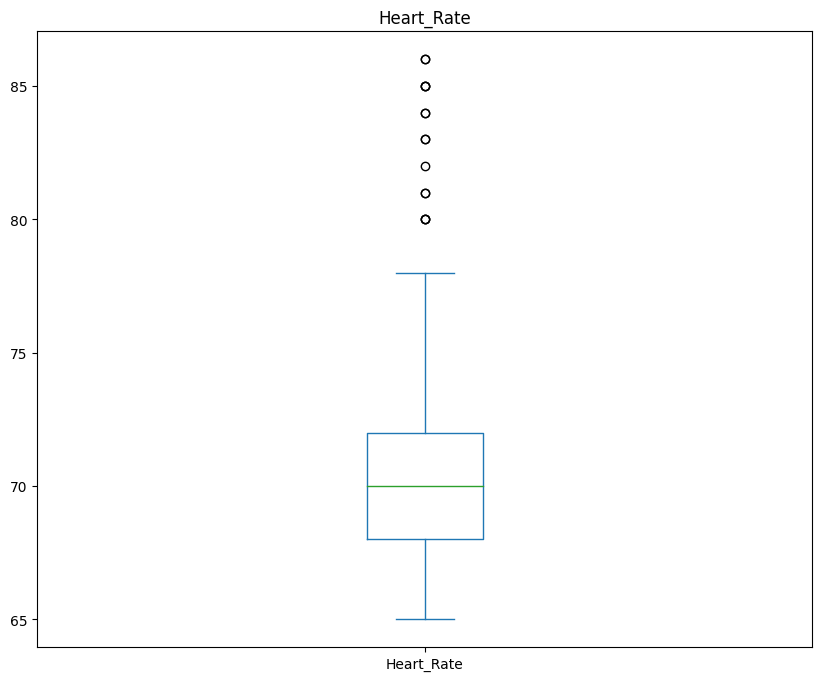

In [13]:
sleep_df['Heart_Rate'].plot(kind='box', title='Heart_Rate', figsize=(10,8))

In [14]:
for col in num_cols:
    print(sleep_df[col].name + ' skewness: ' + str(sleep_df[col].skew()))
    print(sleep_df[col].name + ' kurtosis: ' + str(sleep_df[col].kurt()))

Person_ID skewness: 0.0
Person_ID kurtosis: -1.1999999999999997
Age skewness: 0.2572221422742844
Age kurtosis: -0.9097795476259596
Sleep_Duration skewness: 0.0375543898464848
Sleep_Duration kurtosis: -1.2865062390450739
Quality_of_Sleep skewness: -0.20744763173836042
Quality_of_Sleep kurtosis: -0.748275541854805
Physical_Activity_Level skewness: 0.074486902720102
Physical_Activity_Level kurtosis: -1.266067771896159
Stress_Level skewness: 0.1543295816157822
Stress_Level kurtosis: -1.327306564457838
Heart_Rate skewness: 1.2248235470533515
Heart_Rate kurtosis: 2.2864546672035746
Daily_Steps skewness: 0.17827733092832265
Daily_Steps kurtosis: -0.39403060182215066


Guide:
1. Jika kemiringan antara -0,5 dan 0,5, maka data cukup simetris.
2. Jika kemiringan antara -1 dan –0,5 atau antara 0,5 dan 1, maka data cukup miring.
3. Jika kemiringan kurang dari -1 atau lebih besar dari 1, maka data sangat miring.

dapat dilihat dari skewness bahwa dari data sleep_healt hanya data **Heart Rate** yang memiliki data miring sehingga diperlukan cleansing

Cleansing data oitliers dapat dilakukan dengan IQR dikarenakan data tidak terdistribusi normal

In [15]:
# dikarenakan data tidak terdistribusi normal maka dapat menggunakan quartile
Q1 = sleep_df.Heart_Rate.quantile(0.25)
Q3 = sleep_df.Heart_Rate.quantile(0.75)
Q1, Q3

(68.0, 72.0)

In [16]:
# Interquartile Range
IQR = Q3 - Q1
IQR

4.0

In [17]:
# outliear dengan std
upper_limit= Q3 + 3*sleep_df['Heart_Rate'].std()
lower_limit= Q1 - 3*sleep_df['Heart_Rate'].std()

print(upper_limit)
print(lower_limit)

84.40702660533665
55.59297339466335


In [18]:
outlier_iqr = sleep_df[(sleep_df.Heart_Rate > upper_limit) | (sleep_df.Heart_Rate < lower_limit)]
outlier_iqr

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
2,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
339,277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea
340,278,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea


Insight:\
Berdasarkan analisa yang dilakukan diketahui bahwa data heart rate mengandung outlier. orang yang memiliki Heart_rate yang tinggi dipengaruhi oleh sleep disorder  outlier dirasa normal sehingga tidak dilakukan cleansing

## Tipe pekerjaan apa dengan kualitas tidur terbaik (barchart)

In [19]:
best_job = client.query('''
SELECT Occupation, round(AVG(Quality_of_Sleep),2) kualitas_tidur
FROM milestone1.Sleep_health_and_lifestyle_dataset
GROUP BY Occupation
ORDER BY kualitas_tidur DESC''').to_dataframe()

best_job

,Occupation,kualitas_tidur
0,Engineer,8.41
1,Lawyer,7.89
2,Accountant,7.89
3,Nurse,7.37
4,Manager,7.00
5,Teacher,6.97
6,Doctor,6.65
7,Software Engineer,6.50
8,Salesperson,6.00
9,Scientist,5.00


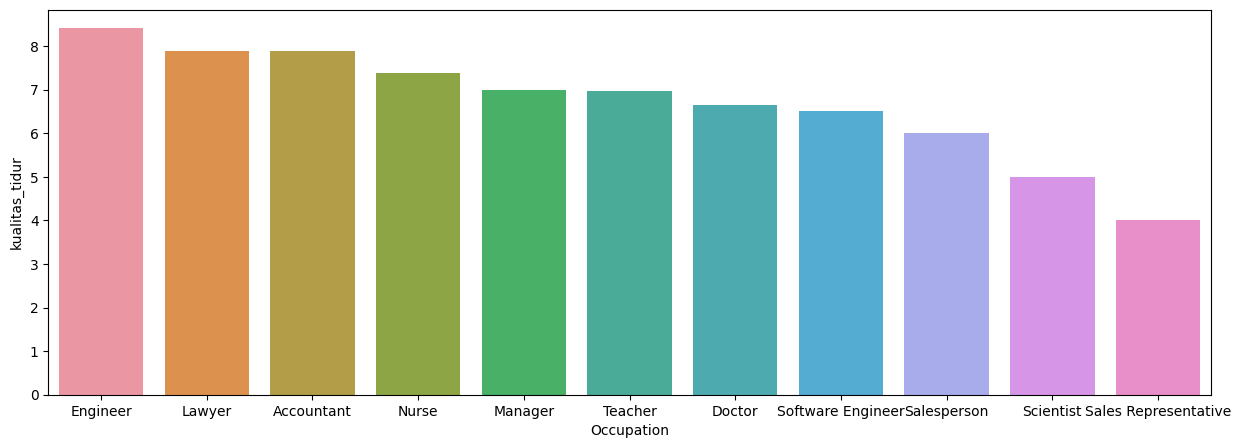

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data=best_job, x="Occupation", y="kualitas_tidur")

plt.show()


Insight : \
Pekerjaan dengan kualitas tidur terbaik adalah Engineer di ikuti lawyer pada posisi ke 2 dan yang memiliki kualitas tidur yang tidak baik adalah sales representative

## Waktu tidur dengan kualitas tidur(lineplot)

In [21]:
df = sleep_df[['Sleep_Duration', 'Quality_of_Sleep']]

df

,Sleep_Duration,Quality_of_Sleep
0,5.8,4
1,5.8,4
2,5.9,4
3,5.9,4
4,5.9,4
...,...,...
369,8.1,9
370,8.0,9
371,8.1,9
372,8.1,9


In [22]:
df.corr()

,Sleep_Duration,Quality_of_Sleep
Sleep_Duration,1.000000,0.883213
Quality_of_Sleep,0.883213,1.000000


<Axes: xlabel='Sleep_Duration', ylabel='Quality_of_Sleep'>

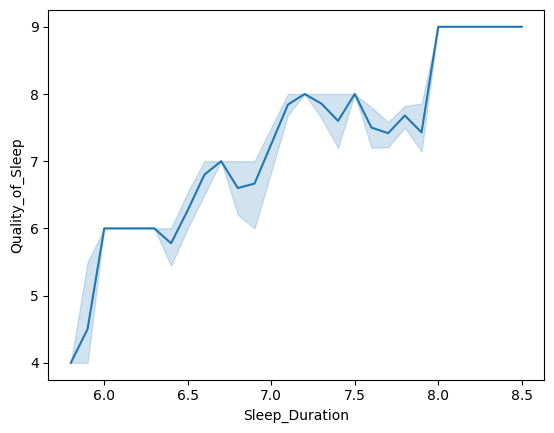

In [23]:
sns.lineplot(data=df, x="Sleep_Duration", y="Quality_of_Sleep")

Insight : \
Waktu tidur memiliki korelasi positif dengan kualitas tidur sebesar 88% , ini dapat diartikan bahwa semakin lama waktu tertidur maka semakin baik juga kualitas tidur yang didapatkan

## Tingkat stress berdasarkan waktu tidur dan pekerjaannya (Scatterplot)

In [24]:
stress = client.query('''
SELECT Occupation, round(AVG(Stress_Level),2) Stress_Level, round(AVG(Sleep_Duration),2) waktu_tidur
FROM milestone1.Sleep_health_and_lifestyle_dataset
GROUP BY Occupation
ORDER BY Stress_Level DESC''').to_dataframe()

stress

,Occupation,Stress_Level,waktu_tidur
0,Sales Representative,8.00,5.90
1,Scientist,7.00,6.00
2,Salesperson,7.00,6.40
3,Doctor,6.73,6.97
4,Software Engineer,6.00,6.75
5,Nurse,5.55,7.06
6,Lawyer,5.06,7.41
7,Manager,5.00,6.90
8,Accountant,4.59,7.11
9,Teacher,4.53,6.69


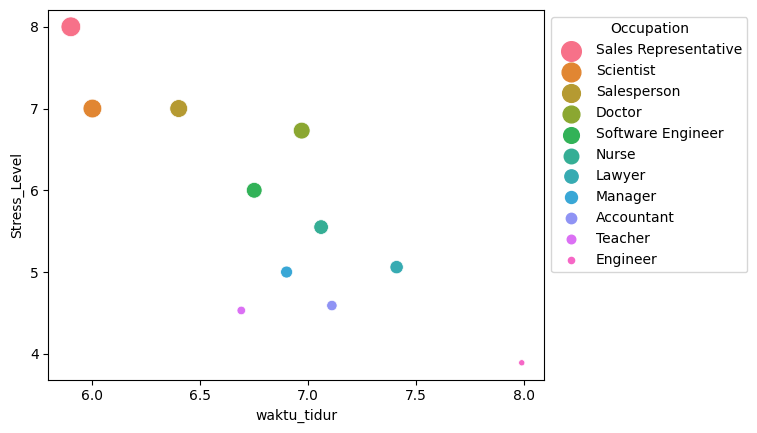

In [25]:
ax = sns.scatterplot(data=stress, x="waktu_tidur", y="Stress_Level",hue="Occupation", size="Occupation",
    sizes=(20, 200))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #mengeluarkan kotak hue agar plot terlihat jelas

Insight:\
Waktu tidur yang kurang menyebabkan tingkat stress yang tinggi. pekerjaan dengan waktu tidur paling sedikit dan tingkat stress tertinggi adalah sales

## Umur Orang terkena sleep disorder (barchart)

In [26]:
umur = client.query('''
SELECT
    Age,
    COUNT(Sleep_Disorder) as cnt
FROM
    milestone1.Sleep_health_and_lifestyle_dataset
WHERE
    Sleep_Disorder NOT LIKE '%None%'
GROUP By
    Age
ORDER BY
    Age
''').to_dataframe()

umur.tail()

,Age,cnt
20,53,1
21,55,2
22,57,8
23,58,6
24,59,14


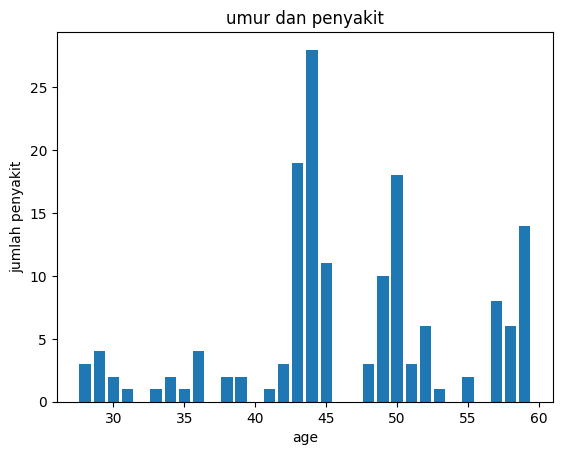

In [27]:
plt.bar(umur['Age'], umur['cnt'])
plt.xlabel("age")
plt.ylabel("jumlah penyakit")
plt.title("umur dan penyakit")
plt.show()

Insight:\
Kemungkinan orang akan terkena sleep disorder apabila tidak menjaga kesehatan tubuh adalah pada rentang umur 40-45 tahun. Jadi apabila pada usia muda suka begadang atau tidak menjaga kesehatan tubuh maka tidak akan berdampak secara langsung baru pada umur 40-45 akan muncul gejala2 sleep disorder

## Apakah orang dengan tipe badan obese berkemungkinan mengalamai sleep apnea lebih tinggi (Chi Square)

Chi-square test is used for testing of independence between two categorical data. Since statistics handling the numerical data, we need to calculate the frequency of each variable and presented by a contingency table.

In [28]:
contingency_table=pd.crosstab(sleep_df["BMI_Category"],sleep_df["Sleep_Disorder"])
contingency_table

Sleep_Disorder,Insomnia,None,Sleep Apnea
BMI_Category,,,
Normal Weight,9,200,7
Obese,4,0,6
Overweight,64,19,65


In [29]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.000
Probably dependent


<Axes: xlabel='BMI_Category'>

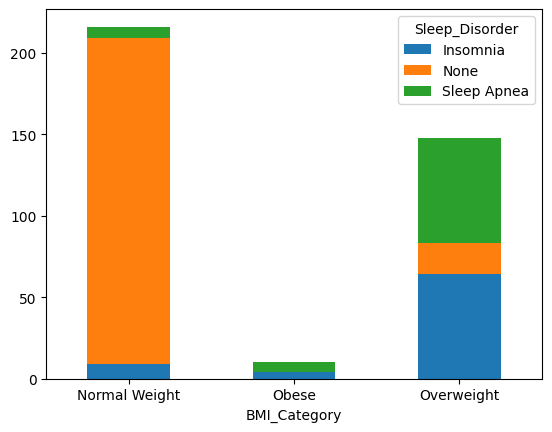

In [30]:
contingency_table.plot(kind='bar', stacked=True, rot=0)

In [31]:
gen = pd.crosstab(sleep_df['Gender'],sleep_df["Sleep_Disorder"])
gen

Sleep_Disorder,Insomnia,None,Sleep Apnea
Gender,,,
Female,36,82,67
Male,41,137,11


<Axes: xlabel='Gender'>

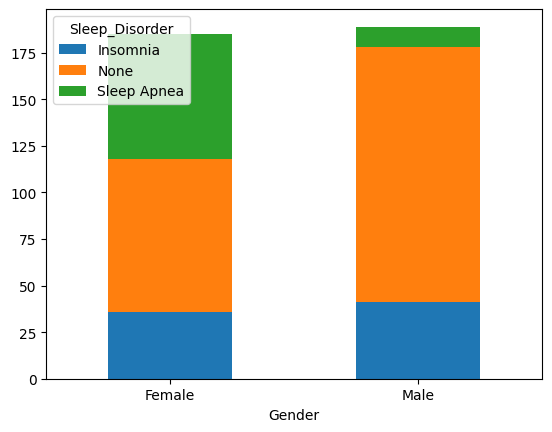

In [32]:
gen.plot(kind='bar', stacked=True, rot=0)

Apnea tidur atau sleep apnea adalah gangguan tidur yang menyebabkan pernapasan seseorang terhenti sementara selama beberapa kali saat sedang tidur. Kondisi ini dapat ditandai dengan mengorok saat tidur dan tetap merasa mengantuk setelah tidur lama. [sumber](https://www.alodokter.com/sleep-apnea)

Insight :\
Dari data ditemukan bahwa orang dengan BMI obese banyak terkena sleep apnea namun,orang dengan BMI Overwieght lebih memungkinkan untuk menderita sleep apnea. Pada laki2 secara umum lebih banyak menderita insomnia sedangkan wanita lebih banyak mengidap sleep apnea


# Kesimpulan

Kesehatan merupakan salah satu hal yang diperhatikan apabila kita tidak memilikinya. Tidur merupakan hal yang paling penting dalam menjaga tubuh agar tetap fit, Kualitas tidur yang baik dipengaruhi oleh waktu tidur yang cukup, waktu tidur dan kualitas tidur memiliki korelasi sebesar 88%. Waktu tidur yang kurang dapat menyebabkan tingkat stress yang lebih tinggi, Sales Representative merupakan pekerjaan dengan tingkat stress yang tinggi dan waktu tidur yang kurang, Sedangkan pekerjaan dengan kualitas tidur terbaik ditempati oleh engineer dan lawyer pada posisi ke 2. Apabila kita tidak menjaga waktu tidur kita kemungkinan besar kita akan mengalami sleep disorder, sleep apnea dan insomnia digolongkan kedalam sleep disorder. orang yang terkena sleep disorder biasanya memiliki heart rate yang tinggi. Orang dengan BMI Overweight memiliki peluang besar terkena sleep apnea dibandingkan dengan orang BMI obese/normal. Pada Pria lebih sering mengidap Insomnia dan pada Wanita mengidap sleep apnea